## R တွင် Pandas အသုံးပြုမှု

R တွင် pandas အသုံးပြုမှုကို ဖြေရှင်းရန် dplyr library ကို အသုံးပြုရမည်ဖြစ်သည်။ အရင်ဆုံး ပုံမှန် data science library များကို တင်သွင်းခြင်းမှ စတင်ပါမည်။


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

Series သည် list သို့မဟုတ် 1D-array တစ်ခုလိုမျိုးဖြစ်ပြီး၊ index ပါရှိသည်။ လုပ်ဆောင်ချက်အားလုံးသည် index နှင့်အညီညီတူဖြစ်သည်။ R တွင် အတန်းများကို index လုပ်ရန် row.names ကို အသုံးပြုရမည်။


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


တစ်ခုသော အများဆုံး အသုံးပြုမှုများမှာ အချိန်စီးရီးများ ဖြစ်ပါသည်။ အချိန်စီးရီးများတွင်၊ index တွင် အထူးဖွဲ့စည်းမှုရှိပြီး - ပုံမှန်အားဖြင့် ရက်စွဲများ သို့မဟုတ် datetime များ၏ အကွာအဝေးတစ်ခု ဖြစ်ပါသည်။ အချိန်စီးရီးများကို ts function ကို အသုံးပြု၍ အလွယ်တကူ ဖန်တီးနိုင်ပါသည်။ သို့သော် အခြားနည်းလမ်းတစ်ခုဖြင့် အချိန်စီးရီးများကို အကောင်အထည်ဖော်ကြည့်မည်ဖြစ်သည်။ seq function ကို အသုံးပြု၍ ရက်စွဲများ၏ index ကို ဖန်တီးရန် lubridate library ကို အသုံးပြုရမည်ဖြစ်သည်။

ဥပမာအားဖြင့်၊ နေ့စဉ် ဝယ်ယူသော ပစ္စည်းပမာဏကို ပြသသော စီးရီးတစ်ခု ရှိပြီး၊ နေ့စဉ်တစ်နေ့စီတွင် ကျွန်ုပ်တို့အတွက် ထပ်မံပစ္စည်းတစ်ခုကို ဝယ်ယူရမည်ဟု သိရှိထားပါက၊ series ကို အသုံးပြု၍ အောက်ပါအတိုင်း မော်ဒယ်ဖန်တီးနိုင်ပါသည် - 


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


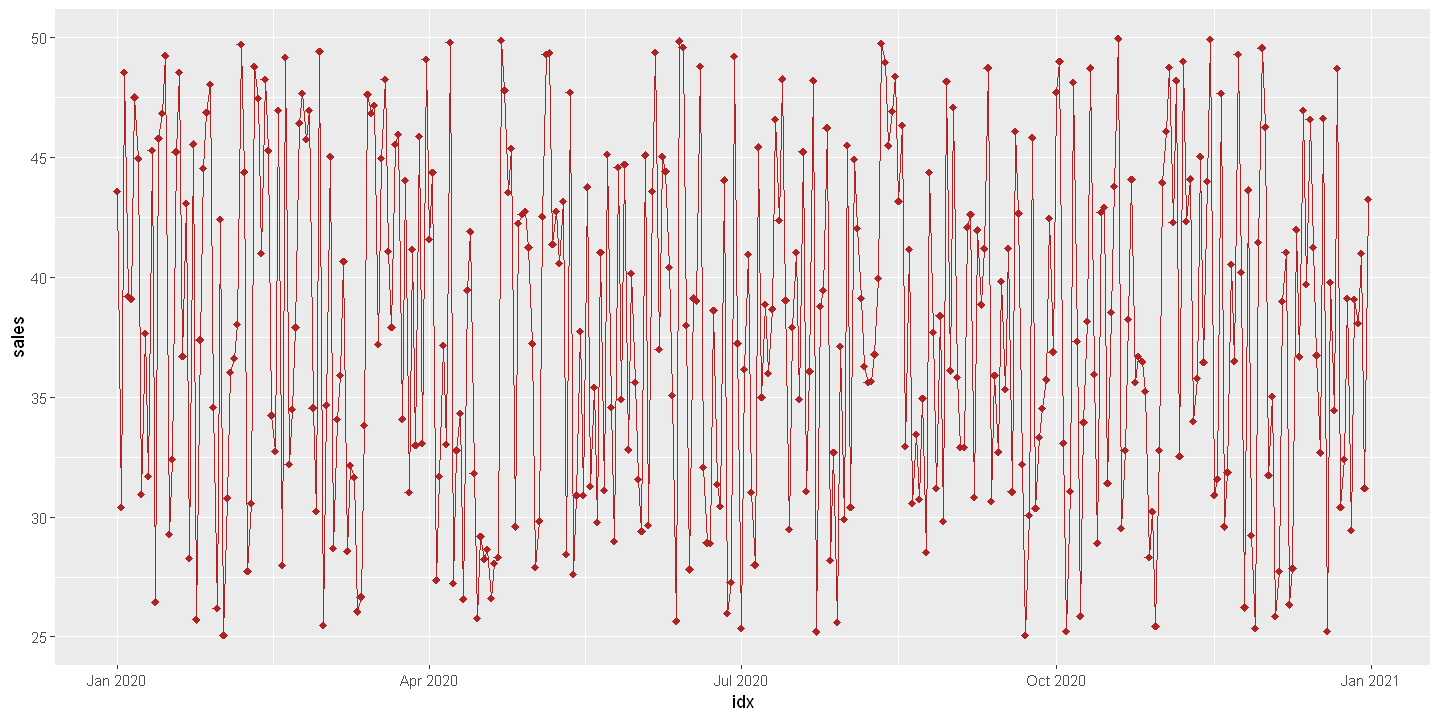

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

ကျွန်တော်တို့ additional_items နဲ့ sold_items ကိုပေါင်းစပ်ပြီး ပစ္စည်းအရေအတွက်စုစုပေါင်းကိုရှာဖွေဖို့လုပ်နေပါတယ်။
သင်မြင်နိုင်သလို၊ ဒီမှာစုစုပေါင်းကိုရှာဖွေရာမှာပြဿနာတွေရှိနေပါတယ်၊ weekly series မှာမဖော်ပြထားတဲ့ရက်တွေကိုမရှိတဲ့အနေအထား (NaN) အဖြစ်ယူဆထားတဲ့အတွက် NaN ကိုနံပါတ်နဲ့ပေါင်းလိုက်ရင် NaN ကိုပဲရပါတယ်။
ပေါင်းစပ်ဖို့အတွက် NaN ကို 0 နဲ့အစားထိုးဖို့လိုပါတယ်။


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

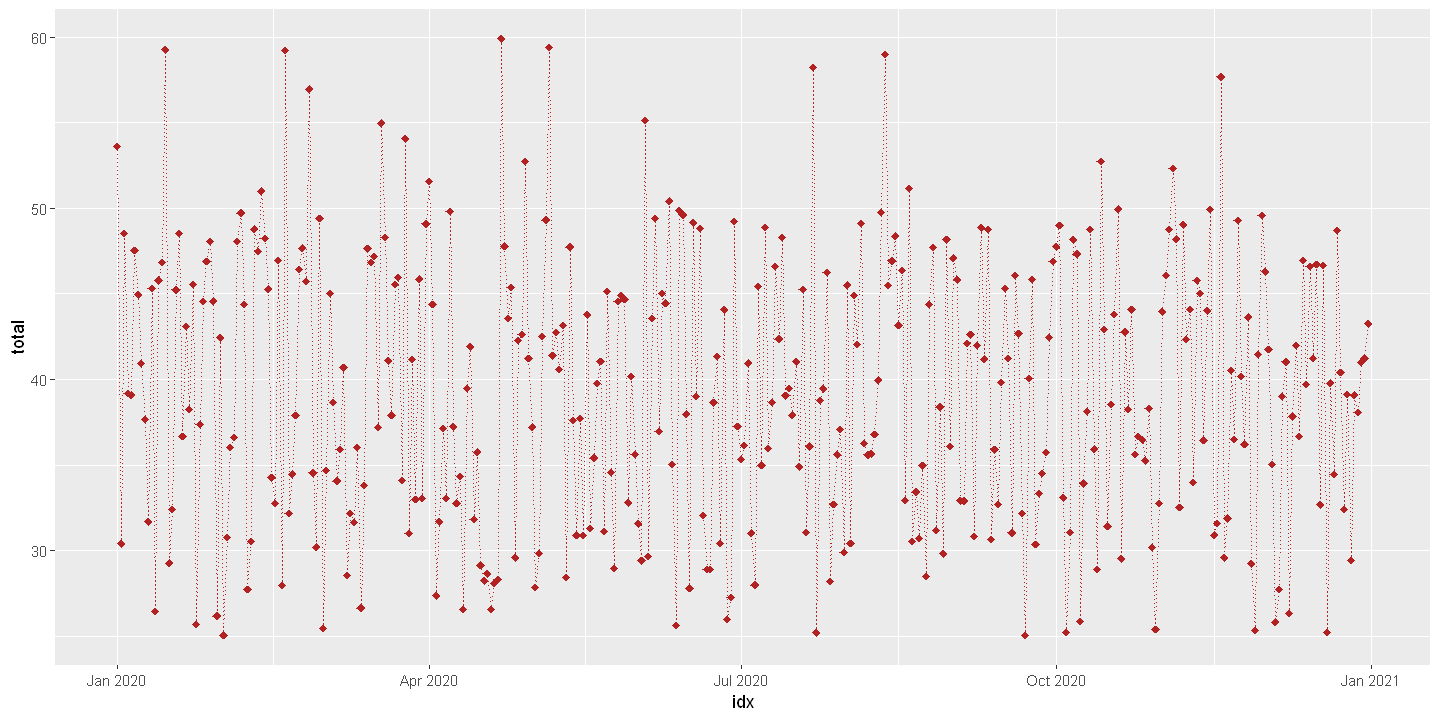

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

ကျွန်ုပ်တို့သည် လစဉ်အခြေပြု၍ ပစ္စည်းအရေအတွက်စုစုပေါင်းကို ခွဲခြမ်းစိတ်ဖြာလိုပါသည်။ ထို့ကြောင့် လစဉ်ပစ္စည်းအရေအတွက်စုစုပေါင်း၏ ပျမ်းမျှတန်ဖိုးကို ရှာဖွေပြီး ဘားဂရပ်ကို ဆွဲဆောင်ပါသည်။


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

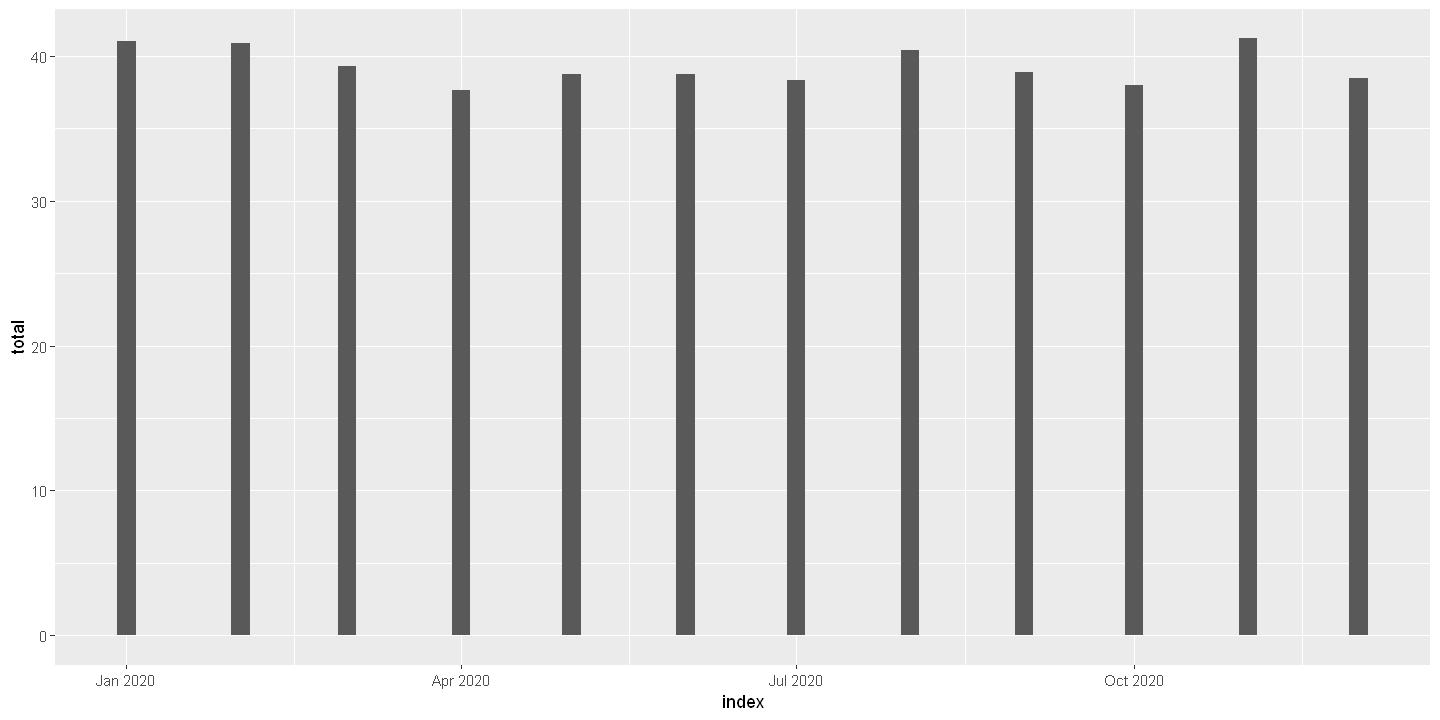

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## DataFrame
DataFrame ဆိုတာ အခြေခံအားဖြင့် တူညီတဲ့ index တွေရှိတဲ့ series တွေကို စုစည်းထားတဲ့ အရာတစ်ခုပါ။ Series အတော်များများကို ပေါင်းစည်းပြီး dataframe တစ်ခုအဖြစ် ဖန်တီးနိုင်ပါတယ်။  
ဥပမာအားဖြင့် a series နဲ့ b series ကို အသုံးပြုပြီး dataframe တစ်ခု ဖန်တီးနေပါတယ်။


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

ကျွန်ုပ်တို့သည် rename လုပ်ဆောင်မှုကို အသုံးပြုခြင်းဖြင့် ကော်လံအမည်ကို ပြန်လည်အမည်ပြောင်းနိုင်ပါသည်။


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

ကျွန်ုပ်တို့သည် dataframe အတွင်းရှိ ကော်လံတစ်ခုကို select function ကို အသုံးပြု၍ ရွေးချယ်နိုင်ပါသည်။


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

ကျွန်ုပ်တို့သည် စီးရီးတစ်ခုအတွင်း သတ်မှတ်ထားသော ယုတ္တိဆိုင်ရာ အဆင့်မီသော အချက်အလက်များကို ရွေးထုတ်မည်။


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

အသစ်သော ကော်လံများ ဖန်တီးခြင်း။

အောက်ပါကုဒ်သည် a ၏ ပျမ်းမျှတန်ဖိုးမှ ကွာခြားမှုကိုတွက်ချက်သည့် series တစ်ခု ဖန်တီးပြီး၊ ထို့နောက် ရှိပြီးသား dataframe ထဲသို့ ပေါင်းစည်းပေးသည်။


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

ကျွန်ုပ်တို့သည် A ကော်လံ၏ စာသားအရှည်ကိုတွက်ချက်ပြီး ရှိပြီးသားဒေတာဖရိမ်းထဲသို့ ပေါင်းစည်းသည့် စီးရီးတစ်ခုကို ဖန်တီးနေပါသည်။


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

နံပါတ်များအပေါ်မူတည်၍ အတန်းများကိုရွေးချယ်ခြင်း


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***အုပ်စုဖွဲ့ခြင်းဆိုသည်မှာ အခြေခံအခြေအနေများအရ ကော်လံများစွာကို အုပ်စုဖွဲ့ခြင်းဖြစ်ပြီး summarise function ကို အသုံးပြု၍ ကွာခြားချက်ကို ကြည့်ရှုနိုင်ပါသည်***

ဥပမာအားဖြင့် LenB တစ်ခုစီအတွက် ကော်လံ A ၏ ပျမ်းမျှတန်ဖိုးကို တွက်ချင်သည်ဟု ဆိုပါစို့။ ထို့နောက် DataFrame ကို LenB အလိုက် အုပ်စုဖွဲ့ပြီး ပျမ်းမျှတန်ဖိုးကို ရှာဖွေကာ အမည်ပေးနိုင်ပါသည်။


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## ပုံနှိပ်ခြင်းနှင့် ရှုထောင်ခြင်း  
head(df) ကို ခေါ်သုံးတဲ့အခါ dataframe ကို ဇယားပုံစံနဲ့ ပုံနှိပ်ပြသပါလိမ့်မယ်။

မည်သည့် ဒေတာသိပ္ပံစီမံကိန်းမဆို ပထမဆုံးအဆင့်မှာ ဒေတာသန့်ရှင်းရေးနဲ့ ရှုထောင်ခြင်းဖြစ်ပါတယ်၊ ဒါကြောင့် ဒေတာအစုအပြုံကို ရှုထောင်ပြီး အသုံးဝင်တဲ့ အချက်အလက်တွေကို ထုတ်ယူဖို့ အရေးကြီးပါတယ်။


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 သည် အလွန်ကောင်းမွန်သော library တစ်ခုဖြစ်ပြီး data frame အတွင်းရှိ data များကို အသုံးပြု၍ ရှုပ်ထွေးသော graph များကို ရိုးရှင်းစွာ ဖန်တီးနိုင်သည်။

ဤ library သည် plot ပြုလုပ်ရန် variable များကို ရွေးချယ်ခြင်း၊ အချို့သော visual property များကို ပြသပုံနှင့် အထွေထွေ visual အင်္ဂါရပ်များကို programmatic အနေနှင့် သတ်မှတ်နိုင်သော အင်္ဂါရပ်များကို ပေးစွမ်းသည်။


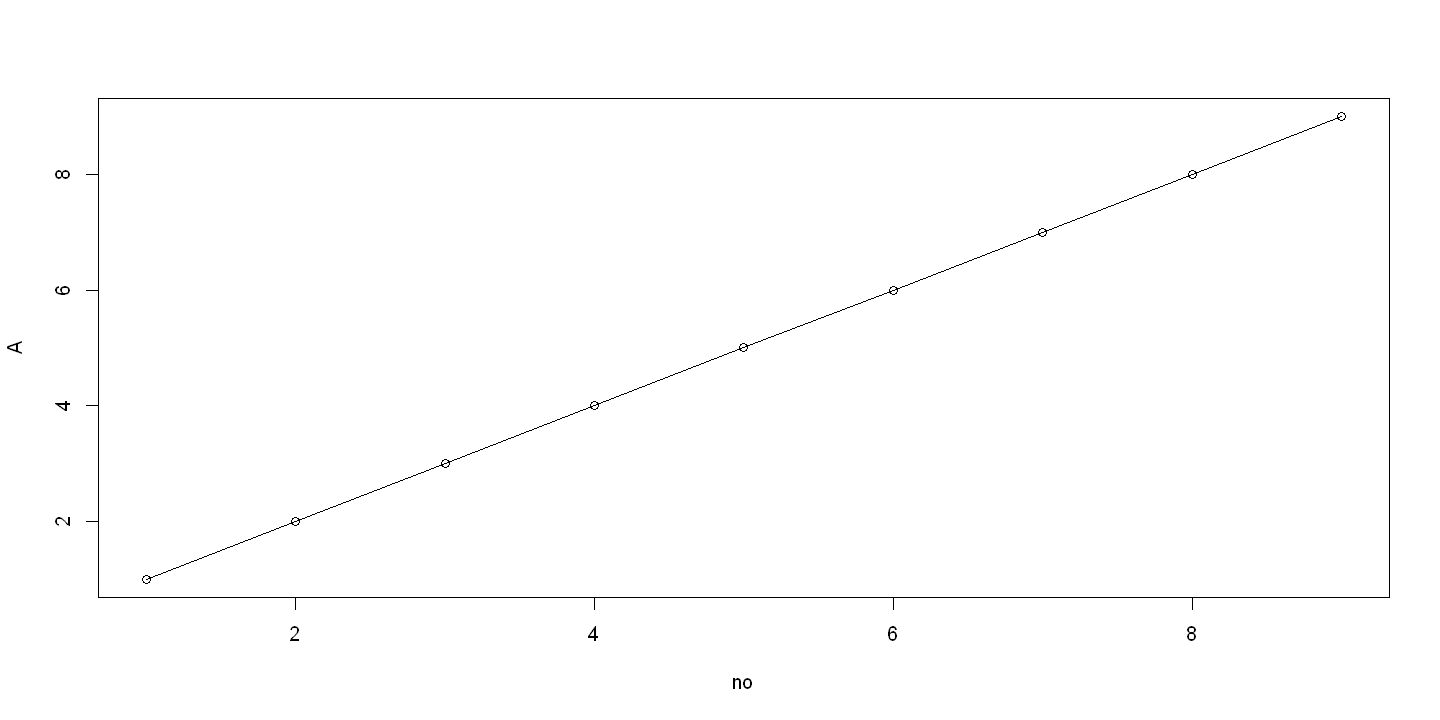

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

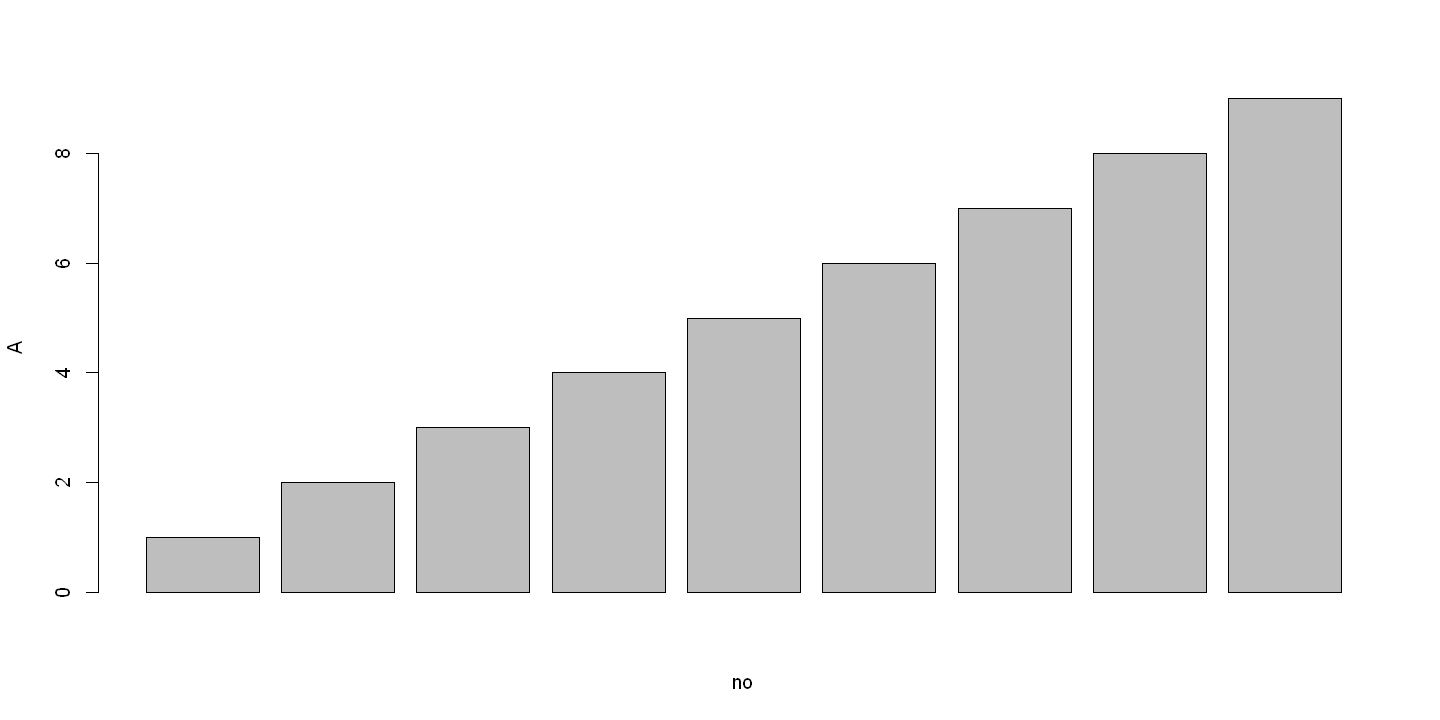

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေပါသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်ဆိုမှုများတွင် အမှားများ သို့မဟုတ် မမှန်ကန်မှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သတိပြုပါ။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်သင့်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူက ဘာသာပြန်ဆိုမှုကို အကြံပြုပါသည်။ ဤဘာသာပြန်ကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပာယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
